In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [86]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import pickle

In [87]:
df = pd.read_csv('/Users/sanghyun/Desktop/Coding/HalfMoon1008.github.io/PJ_DLflask/static/data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
df.shape

(1599, 12)

In [89]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [90]:
data = df.drop(columns=['quality']).copy()
target = df.quality.copy()

In [91]:
from sklearn import model_selection
train_data, test_data, train_target, test_target = model_selection.train_test_split(data, target,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [92]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [93]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [124]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=11, units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('relu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model.add(layers.Dense(units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu'))

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Dense(units=1, activation=None))

In [125]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.mean_squared_error, 
              metrics=[metrics.mean_squared_error]) 

In [126]:
# Call-back 함수
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath='-{epoch:03d}-{loss:.4f}.hdf5',
            monitor='loss', verbose=1, save_best_only=True, mode='min')

# Learning Rate 줄여나가기
LR = ReduceLROnPlateau(monitor='loss',factor=0.8,patience=3, verbose=1, min_lr=1e-8)

CALLBACK = [CP, LR]

In [127]:
history = model.fit(x = train_data, y = train_target, batch_size=100, epochs=1000, shuffle=True, validation_split=0.3, verbose=0, callbacks=CALLBACK) 


Epoch 1: loss improved from inf to 1798.82898, saving model to -001-1798.8290.hdf5

Epoch 2: loss improved from 1798.82898 to 682.96887, saving model to -002-682.9689.hdf5

Epoch 3: loss improved from 682.96887 to 298.91129, saving model to -003-298.9113.hdf5

Epoch 4: loss improved from 298.91129 to 219.37613, saving model to -004-219.3761.hdf5

Epoch 5: loss improved from 219.37613 to 139.07892, saving model to -005-139.0789.hdf5

Epoch 6: loss improved from 139.07892 to 72.32697, saving model to -006-72.3270.hdf5

Epoch 7: loss improved from 72.32697 to 55.87006, saving model to -007-55.8701.hdf5

Epoch 8: loss improved from 55.87006 to 38.38663, saving model to -008-38.3866.hdf5

Epoch 9: loss improved from 38.38663 to 30.28350, saving model to -009-30.2835.hdf5

Epoch 10: loss improved from 30.28350 to 24.39283, saving model to -010-24.3928.hdf5

Epoch 11: loss improved from 24.39283 to 18.12839, saving model to -011-18.1284.hdf5

Epoch 12: loss improved from 18.12839 to 15.00593

In [135]:
model.load_weights("-426-2.1190.hdf5")

In [136]:
result = model.evaluate(test_data, test_target)

print('loss (mean_squared_error) :', result[0])

15/15 [==============================] - 0s 5ms/step - loss: 5.0265 - mean_squared_error: 5.0265
loss (mean_squared_error) : 5.026540756225586


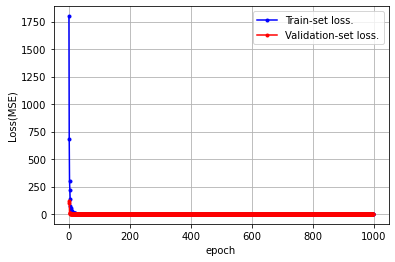

In [137]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

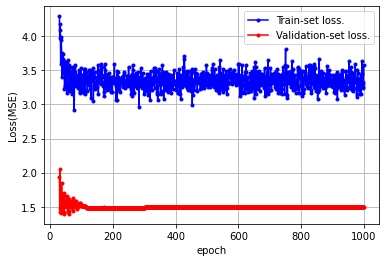

In [138]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len[30:], loss[30:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[30:], val_loss[30:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [139]:
# Prediction on test data
model.predict(test_data)

15/15 [==============================] - 0s 3ms/step


array([[3.5819077],
       [2.5708828],
       [4.111113 ],
       [3.6307302],
       [3.8413258],
       [2.9753857],
       [4.006136 ],
       [3.6471472],
       [3.834992 ],
       [3.0399394],
       [3.6635695],
       [4.3126674],
       [3.1785529],
       [3.1191192],
       [3.183498 ],
       [4.0914936],
       [3.706017 ],
       [3.9632509],
       [4.137395 ],
       [3.1381485],
       [3.1144211],
       [3.9585998],
       [3.823266 ],
       [2.4897478],
       [2.9835625],
       [3.3815107],
       [3.2569897],
       [4.068019 ],
       [3.2170873],
       [4.447569 ],
       [4.211648 ],
       [3.2517843],
       [3.3023167],
       [3.4678898],
       [4.318062 ],
       [4.390856 ],
       [2.8954926],
       [3.385695 ],
       [3.8821683],
       [3.0329103],
       [3.690639 ],
       [2.2845025],
       [3.4262748],
       [4.545429 ],
       [4.0931664],
       [2.791754 ],
       [3.1667252],
       [3.1339474],
       [3.7153468],
       [3.3628616],


In [140]:
sample_data = np.array([[7.9, 0.52, 0.26, 2.2, 0.79, 14, 38, 0.99, 3.31, 0.62, 10.2]])

In [141]:
model.predict(sample_data)

1/1 [==============================] - 0s 17ms/step


array([[3.4127903]], dtype=float32)